In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium

In [3]:
df_customer = pd.read_csv('/content/drive/My Drive/DAC Project/customer_trend.csv')
df_customer

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [4]:
result = df_customer[(df_customer['Discount Applied'] == 'No') & (df_customer['Promo Code Used'] == 'Yes')]
print(result)

result2 = df_customer[(df_customer['Discount Applied'] == 'Yes') & (df_customer['Promo Code Used'] == 'No')]
print(result2)

# hence the above code shows that we found no difference between discount applied and promo code used, hence we will drop promo code used and keep discount applied.

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [5]:
#check is there any duplicated value, True: duplicate/ False: no duplicates
duplicates = df_customer.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool


In [6]:
#finding the number of duplicated values
df_customer.duplicated().sum()
# hence there is no duplicates to remove

0

In [7]:
#check the data type
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
#if there are null values
df_customer.isnull().sum()
# there is no null values in this dataset

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
# drop unnecessary columns that are not needed in this approach
df_customer.drop(['Customer ID', 'Gender', 'Item Purchased', 'Category', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Promo Code Used', 'Previous Purchases'], axis=1, inplace=True)
df_customer

,Age,Purchase Amount (USD),Location,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases
0,55,53,Kentucky,Express,Yes,Venmo,Fortnightly
1,19,64,Maine,Express,Yes,Cash,Fortnightly
2,50,73,Massachusetts,Free Shipping,Yes,Credit Card,Weekly
3,21,90,Rhode Island,Next Day Air,Yes,PayPal,Weekly
4,45,49,Oregon,Free Shipping,Yes,PayPal,Annually
...,...,...,...,...,...,...,...
3895,40,28,Virginia,2-Day Shipping,No,Venmo,Weekly
3896,52,49,Iowa,Store Pickup,No,Bank Transfer,Bi-Weekly
3897,46,33,New Jersey,Standard,No,Venmo,Quarterly
3898,44,77,Minnesota,Express,No,Venmo,Weekly


In [10]:
# Mapping 'Yes' to 1 and 'No' to 0 in the 'Discount Applied' column
df_customer['Discount Applied'] = df_customer['Discount Applied'].replace({'Yes': 1, 'No': 0})
df_customer

,Age,Purchase Amount (USD),Location,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases
0,55,53,Kentucky,Express,1,Venmo,Fortnightly
1,19,64,Maine,Express,1,Cash,Fortnightly
2,50,73,Massachusetts,Free Shipping,1,Credit Card,Weekly
3,21,90,Rhode Island,Next Day Air,1,PayPal,Weekly
4,45,49,Oregon,Free Shipping,1,PayPal,Annually
...,...,...,...,...,...,...,...
3895,40,28,Virginia,2-Day Shipping,0,Venmo,Weekly
3896,52,49,Iowa,Store Pickup,0,Bank Transfer,Bi-Weekly
3897,46,33,New Jersey,Standard,0,Venmo,Quarterly
3898,44,77,Minnesota,Express,0,Venmo,Weekly


Visualizations

Should a certain payment method have added incentives to increase its usage (like a discount) [ x-axis: payment method ; y-axis: frequency)

In [11]:
df_customer['Payment Method'].value_counts()#value_counts() count the number of unique values base on specific column

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

In [12]:
Payment_Method = ['Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo']
Frequency = [612, 670, 671, 636, 677, 634]

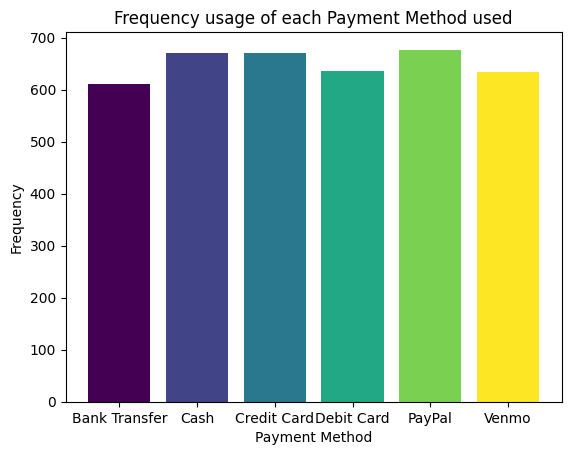

In [13]:
# Plotting the bar graph
x_values = (Payment_Method)
y_values = (Frequency)

plt.title('Frequency usage of each Payment Method used')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
colors = plt.cm.viridis(np.linspace(0, 1, len(Payment_Method)))

plt.bar(x_values, y_values, color=colors)

plt.show()

In [14]:
# From the above bar chart, we can see that the different types of payment method do not have big differences between them
# Bank Transfer is the least used --> 612 times
# PayPal is the most used --> 677 times
# If we are interested in increasing the usage of Bank Transfers we can provide more discounts when consumers use certain banks to pay for their purchases.

Does the purchase amount (x-axis) influence the type of payment method (y-axis) ? (correlation) (0 and 1 will be discount applied or not → different colours)

In [15]:
# Finding the number of dicounts applied
# 0 --> No Discount Applied
# 1 --> Discount Applied
df_customer['Discount Applied'].value_counts()

0    2223
1    1677
Name: Discount Applied, dtype: int64

<Axes: xlabel='Discount Applied', ylabel='count'>

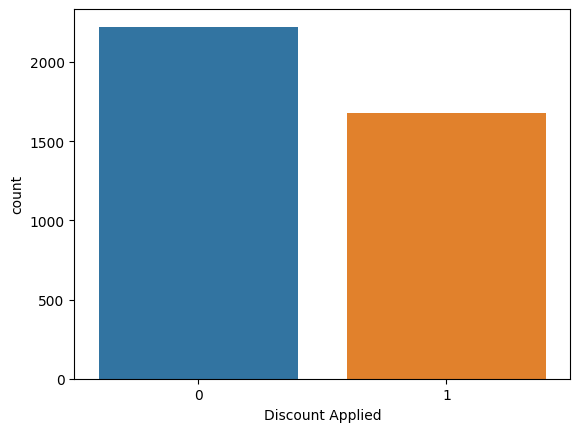

In [16]:
sns.countplot(data=df_customer, x='Discount Applied')
# To show the how many Yes and No for Discount Applied

In [17]:
grp_type_yes = df_customer.groupby('Payment Method')['Discount Applied'].sum().reset_index()
grp_type_yes
# This is the count for the no. of Yes to Discount Applied for each type of payment used

,Payment Method,Discount Applied
0,Bank Transfer,259
1,Cash,283
2,Credit Card,280
3,Debit Card,289
4,PayPal,280
5,Venmo,286


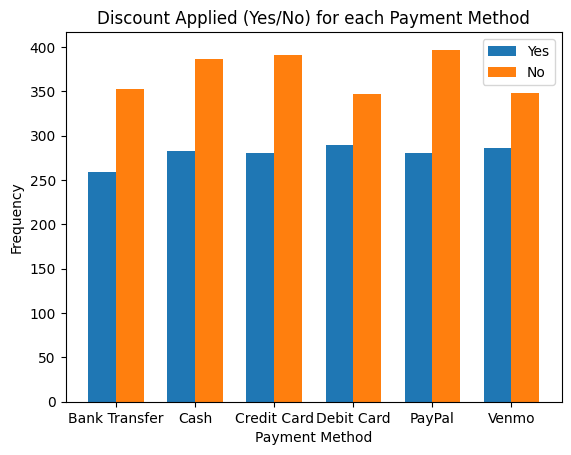

In [18]:
## The number of Yes and No for Discount Applied for each Payment Method
## For all payement methods, there is always more No for discount applied.

Frequency_Discount_Yes = [259, 283, 280, 289, 280, 286]
Frequency_Discount_No = [353, 387, 391, 347, 397, 348]
bar_width = 0.35

bar_positions1 = np.arange(len(Payment_Method))
bar_positions2 = bar_positions1 + bar_width

plt.bar(bar_positions1, Frequency_Discount_Yes, width=bar_width, label='Yes')
plt.bar(bar_positions2, Frequency_Discount_No, width=bar_width, label='No')

plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Discount Applied (Yes/No) for each Payment Method')
plt.xticks(bar_positions1 + bar_width / 2, Payment_Method)

plt.legend()
plt.show()

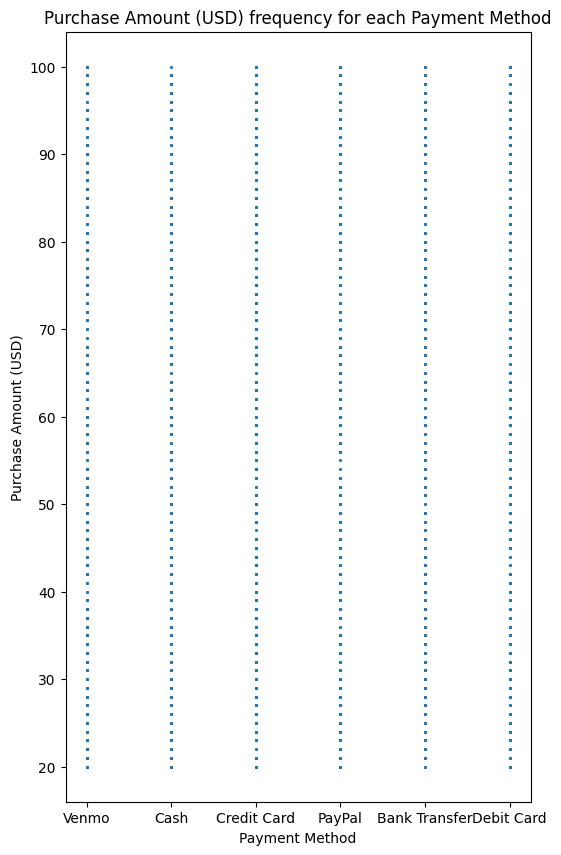

In [19]:
## Does the purchase amount affect the type of payment
## Create a scatter plot
plt.figure(figsize=(6, 10))
plt.scatter(df_customer['Payment Method'], df_customer['Purchase Amount (USD)'], s=1)


# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount (USD) frequency for each Payment Method')

plt.show()

## looks kinda equal tho

Does the location affect the frequency of purchases?
(use geographical map if possible)

In [20]:
#create a new dataframe to extract just the location and frequency of purchase
df_purchase = df_customer[['Location', 'Frequency of Purchases']].copy()
df_purchase

,Location,Frequency of Purchases
0,Kentucky,Fortnightly
1,Maine,Fortnightly
2,Massachusetts,Weekly
3,Rhode Island,Weekly
4,Oregon,Annually
...,...,...
3895,Virginia,Weekly
3896,Iowa,Bi-Weekly
3897,New Jersey,Quarterly
3898,Minnesota,Weekly


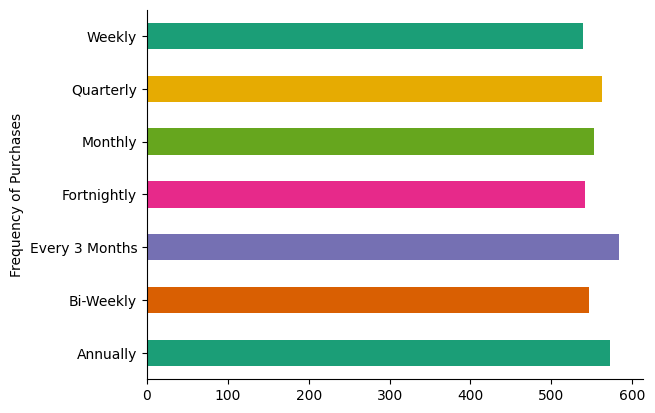

In [21]:
# Seeing the frequency of the frequency of purchases
from matplotlib import pyplot as plt
import seaborn as sns
df_purchase.groupby('Frequency of Purchases').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
## How many of each type of frequency there are?
## To get an understanding of the purchasing behaviourial pattern
value_counts_frequencyofpurchase = df_purchase['Frequency of Purchases'].value_counts()
value_counts_frequencyofpurchase

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

In [23]:
# Replacing the categorial data with an integer value
# 1: Weekly
# 2: Bi-Weekly
# 3: Fortnightly
# 4: Monthly
# 5: Quarterly
# 6: Every 3 Months
# 7: Annually

value_mapping_frequency = {'Weekly': 1, 'Bi-Weekly': 2, 'Fortnightly': 3, 'Monthly': 4, 'Quarterly': 5, 'Every 3 Months': 6, 'Annually': 7}
df_purchase['Frequency of Purchases'] = df_purchase['Frequency of Purchases'].replace(value_mapping_frequency)
df_purchase

,Location,Frequency of Purchases
0,Kentucky,3
1,Maine,3
2,Massachusetts,1
3,Rhode Island,1
4,Oregon,7
...,...,...
3895,Virginia,1
3896,Iowa,2
3897,New Jersey,5
3898,Minnesota,1


In [24]:
# Most common frequency of purchase for each state

most_common_states_purchase = df_purchase.groupby('Location')['Frequency of Purchases'].agg(lambda x: x.mode().iloc[0])
most_common_states_purchase
## Is there any way to present this better? --> put this into the folium map


Location
Alabama           6
Alaska            3
Arizona           2
Arkansas          5
California        4
Colorado          3
Connecticut       7
Delaware          5
Florida           7
Georgia           1
Hawaii            1
Idaho             6
Illinois          2
Indiana           1
Iowa              5
Kansas            2
Kentucky          2
Louisiana         1
Maine             6
Maryland          7
Massachusetts     2
Michigan          5
Minnesota         4
Mississippi       3
Missouri          5
Montana           7
Nebraska          3
Nevada            2
New Hampshire     4
New Jersey        2
New Mexico        7
New York          4
North Carolina    1
North Dakota      6
Ohio              3
Oklahoma          1
Oregon            2
Pennsylvania      6
Rhode Island      2
South Carolina    7
South Dakota      7
Tennessee         1
Texas             4
Utah              6
Vermont           5
Virginia          5
Washington        6
West Virginia     5
Wisconsin         7
Wyoming    

In [59]:
from pathlib import Path
filepath = Path('My Drive/DAC Project/most_common_states_purchase.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
most_common_states_purchase.to_csv(filepath)

In [58]:
most_common_states_purchase.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

'Location,Frequency of Purchases\nAlabama,6\nAlaska,3\nArizona,2\nArkansas,5\nCalifornia,4\nColorado,3\nConnecticut,7\nDelaware,5\nFlorida,7\nGeorgia,1\nHawaii,1\nIdaho,6\nIllinois,2\nIndiana,1\nIowa,5\nKansas,2\nKentucky,2\nLouisiana,1\nMaine,6\nMaryland,7\nMassachusetts,2\nMichigan,5\nMinnesota,4\nMississippi,3\nMissouri,5\nMontana,7\nNebraska,3\nNevada,2\nNew Hampshire,4\nNew Jersey,2\nNew Mexico,7\nNew York,4\nNorth Carolina,1\nNorth Dakota,6\nOhio,3\nOklahoma,1\nOregon,2\nPennsylvania,6\nRhode Island,2\nSouth Carolina,7\nSouth Dakota,7\nTennessee,1\nTexas,4\nUtah,6\nVermont,5\nVirginia,5\nWashington,6\nWest Virginia,5\nWisconsin,7\nWyoming,7\n'

In [25]:
# Merging the new found mode of frequency of purchase for each state into our df_purchase
df_purchase = pd.merge(df_purchase, most_common_states_purchase, on='Location')
df_purchase

,Location,Frequency of Purchases_x,Frequency of Purchases_y
0,Kentucky,3,2
1,Kentucky,6,2
2,Kentucky,1,2
3,Kentucky,2,2
4,Kentucky,3,2
...,...,...,...
3895,Michigan,6,5
3896,Michigan,7,5
3897,Michigan,6,5
3898,Michigan,6,5


In [26]:
# Renaming the column name to "Purchase Mode"
df_purchase.rename(columns={'Frequency of Purchases_y': 'Purchase Mode'}, inplace=True)

In [27]:
# Checking to see whether the column name has been changed
df_purchase

,Location,Frequency of Purchases_x,Purchase Mode
0,Kentucky,3,2
1,Kentucky,6,2
2,Kentucky,1,2
3,Kentucky,2,2
4,Kentucky,3,2
...,...,...,...
3895,Michigan,6,5
3896,Michigan,7,5
3897,Michigan,6,5
3898,Michigan,6,5


In [28]:
# Dropping the unneccessary column and renaming the dataframe to purchase_mode_df
purchase_mode_df = df_purchase.drop(columns='Frequency of Purchases_x')
purchase_mode_df

,Location,Purchase Mode
0,Kentucky,2
1,Kentucky,2
2,Kentucky,2
3,Kentucky,2
4,Kentucky,2
...,...,...
3895,Michigan,5
3896,Michigan,5
3897,Michigan,5
3898,Michigan,5


In [29]:
# Checking for duplicates
purchase_mode_df.duplicated().sum()

3850

In [30]:
# Dropping duplicates
purchase_mode_df = purchase_mode_df.drop_duplicates()
purchase_mode_df

,Location,Purchase Mode
0,Kentucky,2
79,Maine,6
156,Massachusetts,2
228,Rhode Island,2
291,Oregon,2
365,Wyoming,7
436,Montana,7
532,Louisiana,1
616,West Virginia,5
697,Missouri,5


In [31]:
# Seeing which form of "Frequency of Purchase" is the most common ammong states
purchase_mode = purchase_mode_df['Purchase Mode'].value_counts()
purchase_mode

2    9
7    9
5    8
6    7
1    7
4    5
3    5
Name: Purchase Mode, dtype: int64

In [32]:
# 1: Weekly
# 2: Bi-Weekly
# 3: Fortnightly
# 4: Monthly
# 5: Quarterly
# 6: Every 3 Months
# 7: Annually

# Among all the states,
# The purchase frequency mode is --> Bi-Weekly & Annually
# Colour Code the states by the 7 different states in the map and see how far apart the different colours are
# The closer the same colours are to each other, there is correlation between location and frequency of purchase
# The further the colours are --> There is no correlation

# Group the states by the mode of purchase
# For each mode of purchase, what's the state in it

# Put it in the map!!

In [33]:
import requests

us_map = folium.Map([43, -100], zoom_start=4, tiles = "cartodbpositron")
us_map # Getting the map of USA

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

folium.Choropleth(
    geo_data= state_geo,
    name='Consumer heatmap',
    data= purchase_mode_df,
    columns=['Location', 'Purchase Mode'], # Need to state the columns
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=2,
    legend_name='Frequency of Purchase',
    highlight=True,
).add_to(us_map)

folium.LayerControl().add_to(us_map)

highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}
style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
BCNT = folium.features.GeoJson(
    state_geo,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],
        aliases=['State name:'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

us_map.add_child(BCNT) # We add this new layer
us_map.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front
folium.LayerControl().add_to(us_map)
us_map

In [34]:
# From the map, we can see that there is a high concentration of red which is the number 7 at the top of the map.
# 7 --> Annually
# There may be some correlation between frequency of purchase and location.

In [38]:
# Save the map as an HTML file
us_map.save('map.html')

# Display the HTML file content
with open('map.html', 'r') as f:
  html_content = f.read()

from IPython.display import display, HTML
display(HTML(html_content))


